# 다중회귀분석

In [1]:
import pandas as pd
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


In [2]:
df.columns

Index(['Ozone', 'Result', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [3]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df[["Ozone"]]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
import numpy as np
X_train = np.array(X_train_scaled,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
X_test = np.array(X_test_scaled,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [7]:
import torch
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

In [8]:
import torch.nn as nn
input_dim = X_train.shape[1]
output_dim = 64
model = nn.Sequential(
    nn.Linear(input_dim,24),
    nn.ReLU(),
    nn.Linear(24,12),
    nn.ReLU(),
    nn.Linear(12,3),
    nn.ReLU(),
    nn.Linear(3,1)
)
print(model)
print(model[6].weight)
print(model[6].bias)

Sequential(
  (0): Linear(in_features=3, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.3892, -0.2468, -0.3122]], requires_grad=True)
Parameter containing:
tensor([0.3302], requires_grad=True)


In [9]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
loss_list = []
iteration_number = 5000
for iteration in range(iteration_number):
    optimizer.zero_grad()
    results = model(inputs)
    loss = mse(results, targets)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 2772.4677734375
epoch 50, loss 647.9863891601562
epoch 100, loss 344.5207214355469
epoch 150, loss 327.07061767578125
epoch 200, loss 306.629638671875
epoch 250, loss 283.8562316894531
epoch 300, loss 266.3223571777344
epoch 350, loss 254.5272216796875
epoch 400, loss 246.85232543945312
epoch 450, loss 238.9452667236328
epoch 500, loss 230.1231231689453
epoch 550, loss 224.53199768066406
epoch 600, loss 219.0987091064453
epoch 650, loss 212.6193389892578
epoch 700, loss 207.5111083984375
epoch 750, loss 200.38629150390625
epoch 800, loss 192.755615234375
epoch 850, loss 184.176513671875
epoch 900, loss 173.4950714111328
epoch 950, loss 157.7039794921875
epoch 1000, loss 142.67369079589844
epoch 1050, loss 130.72698974609375
epoch 1100, loss 124.46479797363281
epoch 1150, loss 119.29019927978516
epoch 1200, loss 115.12963104248047
epoch 1250, loss 111.01212310791016
epoch 1300, loss 102.70992279052734
epoch 1350, loss 94.2331771850586
epoch 1400, loss 88.68888854980469
epo

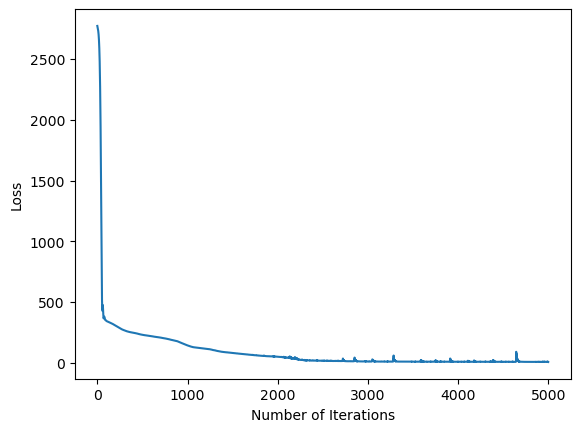

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [11]:
input_x_test = torch.from_numpy(X_test)
predicted = model(input_x_test.float()).data.numpy()
predicted[0:5]

array([[43.917377 ],
       [ 7.5693293],
       [72.96181  ],
       [16.700195 ],
       [48.889977 ]], dtype=float32)

In [12]:
loss.data.item()

7.315774440765381

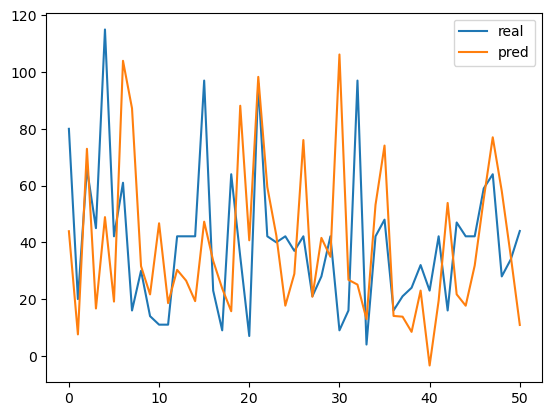

In [13]:
X_test = torch.from_numpy(X_test)
plt.plot(y_test, label='real')
plt.plot(model(X_test).detach().numpy(), label='pred')
plt.legend()
plt.show()